In [2]:
import turicreate as tc

In [3]:
train = tc.SFrame('image_train_data')
test = tc.SFrame('image_test_data')

In [4]:
train.head(2)

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."


In [5]:
train['label'].unique()

dtype: str
Rows: 4
['bird', 'dog', 'cat', 'automobile']

## What’s the least common category in the training data?

In [20]:
sketch = tc.Sketch(train['label'])



+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+




answer_1 : bird

Sketch

https://apple.github.io/turicreate/docs/api/generated/turicreate.Sketch.html?highlight=sketch

## Of the images below, which is the nearest ‘cat’  or "dog" labeled image in the training data to the the first image in the test data (image_test[0:1])?

In [6]:
cat = train[train['label'] == 'cat']
dog = train[train['label'] == 'dog']
bird = train[train['label'] == 'bird']
car = train[train['label'] == 'automobile']

In [7]:
def image_from_id(query_result):
    return train.filter_by(query_result['reference_label'],'id')

In [8]:
image_q23 = test[0:1]

### question2 (cat)

In [12]:
knn2_model = tc.nearest_neighbors.create(cat, label='id', features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [25]:
q2 = knn2_model.query(image_q23).sort("distance")[0:1]


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.703ms     |

| Done         |         | 100         | 47.529ms     |

+--------------+---------+-------------+--------------+

In [26]:
q2_neighbors = image_from_id(q2)
q2_neighbors

id,image,label,deep_features,image_array
16289,Height: 32 Width: 32,cat,"[0.964287519454956, 0.0,0.0, 0.0, ...","[215.0, 219.0, 231.0,215.0, 219.0, 232.0, ..."


,SArray
0,

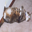

In [27]:
q2_neighbors[0:1]['image'].explore()

answer2 : last_image

### question3(dog)

In [28]:
knn3_model = tc.nearest_neighbors.create(dog,label="id",features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [29]:
q3 = knn3_model.query(image_q23)[0:1]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.439ms     |

| Done         |         | 100         | 56.654ms     |

+--------------+---------+-------------+--------------+

,SArray
0,

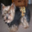

In [31]:
q3_neighbors = image_from_id(q3)
q3_neighbors[0:1]['image'].explore()

## For the first image in the test data, in what range is the mean distance between this image and its 5 nearest neighbors that were labeled ‘cat’  or "dog' in the training data?


### question4 (cat)

In [37]:
q4 = knn2_model.query(image_q23)
q4['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.162ms      |

| Done         |         | 100         | 50.849ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

### question5 (dog)

In [38]:
q5 = knn3_model.query(image_q23)
q5['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.738ms      |

| Done         |         | 100         | 50.373ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

first image in test_data is closer to cat

## In what range is the accuracy of the 1-nearest neighbor classifier at classifying ‘dog’ images from the test set?

In [6]:
cat = train[train['label'] == 'cat']
dog = train[train['label'] == 'dog']
bird = train[train['label'] == 'bird']
car = train[train['label'] == 'automobile']

In [88]:
dogtest = test[test['label'] == "dog"]

In [40]:
## 用train_data to build knn_model, and compare the distance with dog_test data

### knn_model

#### cat

In [41]:
cat_model = tc.nearest_neighbors.create(cat,label="id",features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

#### dog

In [42]:
dog_model = tc.nearest_neighbors.create(dog,label="id",features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

#### bird

In [43]:
bird_model = tc.nearest_neighbors.create(bird,label="id",features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

#### car

In [44]:
car_model = tc.nearest_neighbors.create(car,label="id",features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

### query distance

In [49]:
dog_cat_neighbors = cat_model.query(dogtest,k=1)
dog_dog_neighbors = dog_model.query(dogtest,k=1)
dog_bird_neighbors = bird_model.query(dogtest,k=1)
dog_car_neighbors = car_model.query(dogtest,k=1)

#k is ranking, 也就是說，結果是說result 為最近的距離

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 204.258ms    |

| Done         | 509000  | 100         | 228.556ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 194.02ms     |

| Done         | 509000  | 100         | 229.967ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 186.364ms    |

| Done         | 478000  | 100         | 221.035ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 208.793ms    |

| Done         | 509000  | 100         | 228.192ms    |

+--------------+---------+-------------+--------------+

In [94]:
#result is the shortest distance for each data. the number of data here are 1000
newframe = tc.SFrame({"dog_cat" : dog_cat_neighbors['distance'],
                      "dog_dog" : dog_dog_neighbors['distance'],
                     "dog_bird" : dog_bird_neighbors['distance'],
                     "dog_car"  : dog_car_neighbors['distance']})
newframe.head(5)


dog_bird,dog_car,dog_cat,dog_dog
41.753864730351246,41.957976145712045,36.419607706754384,33.47735903726336
41.3382958924861,46.00213318067789,38.83532688735542,32.845849568405555
38.61575908528905,42.946229069238804,36.97634108541545,35.039707318905855
37.089226995382155,41.68660600484794,34.575007291446106,33.90103276968193
38.27228869398105,39.226966493475835,34.77882479101661,37.484925090925636


In [58]:
def is_dog_correct(row):
    result = False
    if row['dog_bird'] > row["dog_dog"]:
           if row['dog_car'] > row["dog_dog"]:
                if row["dog_cat"] > row["dog_dog"]:
                    result = True
    return result

In [62]:
answer7 = newframe.apply(is_dog_correct)
type(answer7)

turicreate.data_structures.sarray.SArray

In [63]:
sum(answer7)

678